In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt 
%matplotlib inline  

import seaborn as sns


In [2]:
def get_data():
    data = load_svmlight_file("diabetes_scale.txt")
    return data[0], data[1]

X, y = get_data()
# print(X)
# print(X.shape)

# print(y)
# print(y.shape)

X_array = X.toarray()
# print(X_array)
# print(X_array.shape)


In [3]:
n_samples, n_features = X.shape
print(n_samples, n_features)

768 8


# EDA

In [4]:
df_features= pd.DataFrame(X_array)
df_features.rename({0: 'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'Diabetes_pedegree_Function',7:'Age'}, axis=1, inplace=True)
df_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_pedegree_Function,Age
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...
763,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


Text(0.5, 1.0, 'Diabetes Patient')

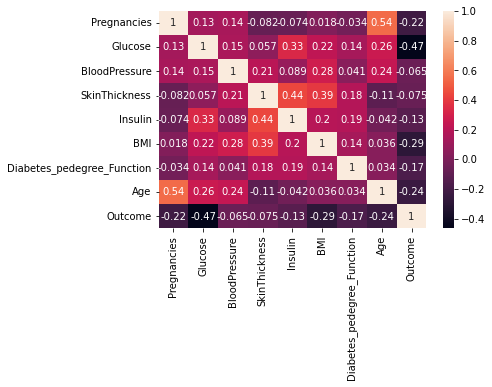

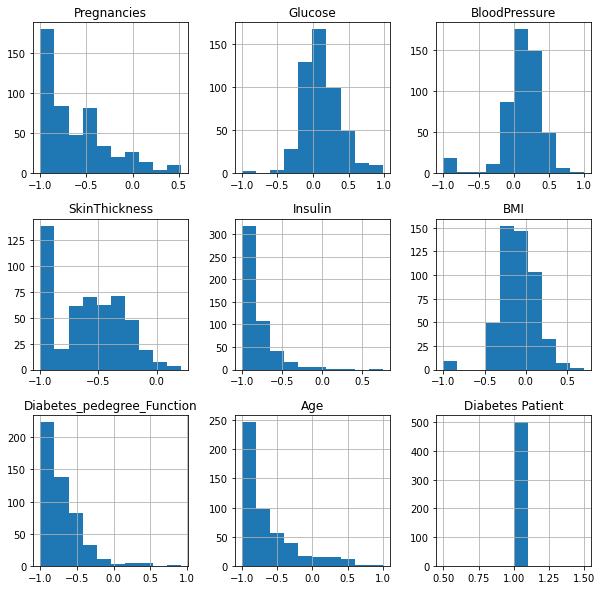

In [5]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# X = df_features[features].values
df_features['Outcome'] = y
# print(df_features)

sns.heatmap(df_features.corr(),annot=True)

p = df_features[df_features['Outcome']==1].hist(figsize = (10,10))
plt.title('Diabetes Patient')

# Basic Perceptron

In [6]:
np.random.seed(0)
m, n = X_array.shape
initial_weight_rand = np.random.rand(n)
initial_weight_normal = np.random.normal(size=(8,))
# print(len(initial_weight_rand))
# for w in initial_weight_rand:
#     print(w)
# for w in initial_weight_uniform[:5]:
#     print(w)

### initial_weight_rand = np.random.rand(n)

In [7]:
m = 3#len(y)
for i in range(m):
    print("Actual ",y[i])
    print('features ', X_array[i])
    print('zero one loss function', y[i]*np.dot(X_array[i],initial_weight_rand))# zero-one Loss Function
    print('zero one loss', (1 if y[i]*np.dot(X_array[i],initial_weight_rand)<0 else 0))
    print("xi*wi",np.sum(initial_weight_rand*X_array[i]))
    print("Prediction ",np.sign(np.sum(initial_weight_rand*X_array[i])))#Prediction to np.sign
    print("------")

Actual  -1.0
features  [-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
 -0.53117    -0.0333333 ]
zero one loss function 0.5485743150369319
zero one loss 0
xi*wi -0.5485743150369319
Prediction  -1.0
------
Actual  1.0
features  [-0.882353  -0.145729   0.0819672 -0.414141  -1.        -0.207153
 -0.766866  -0.666667 ]
zero one loss function -2.252262800900816
zero one loss 1
xi*wi -2.252262800900816
Prediction  -1.0
------
Actual  -1.0
features  [-0.0588235  0.839196   0.0491803 -1.        -1.        -0.305514
 -0.492741  -0.633333 ]
zero one loss function 1.348729098346139
zero one loss 0
xi*wi -1.348729098346139
Prediction  -1.0
------


### initial_weight_normal = np.random.normal(size=(8,)) 

In [41]:
for i in range(0,3):
    print("Actual ",y[i])
    print('features ', X_array[i])
    print('zero one loss function', y[i]*np.dot(X_array[i],initial_weight_normal))
    print('zero one loss', (1 if y[i]*np.dot(X_array[i],initial_weight_rand)<0 else 0))
    
    print("xi*wi",np.sum(initial_weight_normal*X_array[i]))
    print("Prediction ",np.sign(np.sum(initial_weight_normal*X_array[i])))#Prediction to np.sign
    print("------")

Actual  -1.0
features  [-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
 -0.53117    -0.0333333 ]
zero one loss function 1.1772700658771733
zero one loss 0
xi*wi -1.1772700658771735
Prediction  -1.0
------
Actual  1.0
features  [-0.882353  -0.145729   0.0819672 -0.414141  -1.        -0.207153
 -0.766866  -0.666667 ]
zero one loss function -1.9083044362821777
zero one loss 1
xi*wi -1.9083044362821777
Prediction  -1.0
------
Actual  -1.0
features  [-0.0588235  0.839196   0.0491803 -1.        -1.        -0.305514
 -0.492741  -0.633333 ]
zero one loss function 2.324792808439983
zero one loss 0
xi*wi -2.324792808439983
Prediction  -1.0
------


# Split Data into Training/Validation/Testing

In [9]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_array, y, test_size=0.20,random_state=88)#,stratify=y,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.20, random_state=88)#,stratify=y_trainval, shuffle=True)
print("Training Size :",X_train.shape)
print("Testing Size :",X_test.shape)
print("Validation Size :",X_val.shape)

Training Size : (491, 8)
Testing Size : (154, 8)
Validation Size : (123, 8)


In [10]:
def plot_graph(epoch, val_loss_list, train_loss_list, val_acc_list, train_acc_list, figsize=(10,5)):
    
    plt.figure(figsize=figsize)

    plt.subplot(2, 1, 1) 
    plt.title(f'loss curve')
    plt.plot(range(epoch),val_loss_list,label='validation loss')
    plt.plot(range(epoch),train_loss_list,label='training loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
   
    plt.subplot(2, 1, 2) 
    plt.title(f'accuracy curve')
    plt.plot(range(epoch),val_acc_list,label='validation acc')
    plt.plot(range(epoch),train_acc_list,label='training acc')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
def plot_graph_4(epoch, val_loss_list1,val_loss_list2, train_loss_list1, train_loss_list2,
                 val_acc_list1,val_acc_list2, train_acc_list1, train_acc_list2,figsize=(10,10)):
    
    fig, axs = plt.subplots(2, 2,figsize=(10,10))
    axs[0, 0].plot(range(epoch),val_loss_list1,label='validation loss')
    axs[0, 0].plot(range(epoch),train_loss_list1,label='training loss')
    axs[0, 0].set_title("loss curve with initial weight = uniform random")
    axs[1, 0].plot(range(epoch),val_acc_list1,label='validation acc')
    axs[1, 0].plot(range(epoch),train_acc_list1,label='training acc')
    axs[1, 0].set_title("acc curve with initial weight = uniform random")
#     axs[1, 0].sharex(axs[0, 0])
    axs[0, 1].plot(range(epoch),val_loss_list2,label='validation loss')
    axs[0, 1].plot(range(epoch),train_loss_list2,label='training loss')
    axs[0, 1].set_title("loss curve with initial weight = normal random")
    axs[1, 1].plot(range(epoch),val_acc_list2,label='validation acc')
    axs[1, 1].plot(range(epoch),train_acc_list2,label='training acc')
    axs[1, 1].set_title("acc curve with initial weight = normal random")
    fig.tight_layout()
   
#     plt.subplot(2, 1, 2) 
#     plt.title(f'accuracy curve')
#     plt.plot(range(epoch),val_acc_list,label='validation acc')
#     plt.plot(range(epoch),train_acc_list,label='training acc')
#     plt.xlabel("epoch")
#     plt.ylabel("accuracy")
#     plt.legend()
    
#     plt.tight_layout()
    plt.show()

def make_prediction(X,y,weight):
    prediction = []
    for j in X:
        activation_fuc = 0
        for i in range(len(j)):
            activation_fuc += (weight[i]*j[i])
        prediction.append(np.sign(activation_fuc))
    return np.array(prediction)

def zero_one_loss(X,y,weight):
    zero_one_loss = 0
    for i in range(len(y)):
        zero_one_loss += (1 if y[i]*np.dot(X[i],weight)<0 else 0)
    return zero_one_loss/len(y)


def update_weight(X,y,weight, lr=0.01):
    summation = 0
    for i in range(len(y)):
        summation += y[i]*X[i]*(1 if y[i]*np.dot(X[i],weight)<0 else 0) 
    weight += lr*summation
    return weight

# Base Model (epoch = 80, lr = 0.001) initial weight = rand(8)

In [11]:
np.random.seed(0)
initial_weight_rand_1 = np.random.rand(8)


epoch = 80
best_acc = 0
weight = initial_weight_rand_1
val_loss_list = []
train_loss_list = []
val_acc_list = []
train_acc_list = []
for i in range(epoch):
    weight = update_weight(X_train, y_train, weight, lr=0.001)

    y_train_pred = make_prediction(X_train, y_train, weight)
    y_val_pred = make_prediction(X_val, y_val, weight)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    train_loss = zero_one_loss(X_train, y_train, weight)
    val_loss = zero_one_loss(X_val, y_val, weight)
    
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    
    if val_acc>best_acc:
        best_acc = val_acc
    
#     print('weight ', weight)
#     print('EPOCH %d'%(epoch) ,'ITERATION %d'%(i+1), f'LR 0.01')

#     print('train acc: %.5f'%train_acc, 'val acc: %.5f'%val_acc, 
#           'best acc: %.5f'%best_acc)
#     print('train loss: %.5f'%train_loss, 'val loss: %.5f'%val_loss)
    
#     print('----')

In [12]:

base_weight =  [-0.07383355 ,-0.24139846,  0.04499281 ,-0.00637991 , 0.04515345 ,-0.1788288,
 -0.09234288 ,-0.0162605 ]


y_test_pred_base = make_prediction(X_test, y_test, base_weight)

test_acc_base = accuracy_score(y_test, y_test_pred_base)

print('test acc: %.5f'%test_acc_base)


test acc: 0.79221


Accuracy: 0.792208
Precision: 0.841121
Recall: 0.857143
F1 score: 0.849057


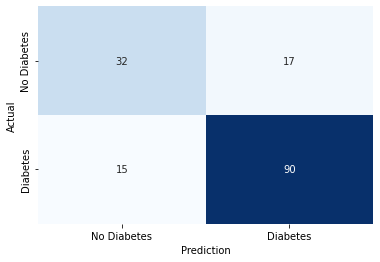

<Figure size 432x288 with 0 Axes>

In [13]:
accuracy = accuracy_score(y_test, y_test_pred_base ) # accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_test_pred_base) # precision tp / (tp + fp)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_test_pred_base) # recall: tp / (tp + fn)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_test_pred_base) # f1: 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % f1)

from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_test_pred_base)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

In [14]:
initial_weight_rand_1.shape

(8,)

sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 0.001


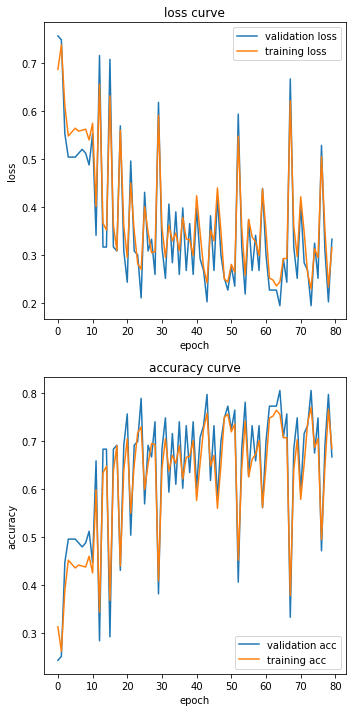

In [15]:
print(f'sample= {n_samples} and feature = {n_features}')
print('EPOCH %d'%(epoch) ,'ITERATION %d'%(i+1), f'LR 0.001')
plot_graph(epoch, val_loss_list, train_loss_list, val_acc_list, train_acc_list, figsize=(5,10))

# experiment 1  (epoch = 80, lr = 0.001) initial weight = normal  

In [16]:
np.random.seed(0)
initial_weight_normal_1 = np.random.normal(size=(8,))


epoch = 80
best_acc = 0
weight = initial_weight_normal_1
val_loss_list = []
train_loss_list = []
val_acc_list = []
train_acc_list = []
for i in range(epoch):
    weight = update_weight(X_train, y_train, weight, lr=0.001)

    y_train_pred = make_prediction(X_train, y_train, weight)
    y_val_pred = make_prediction(X_val, y_val, weight)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    train_loss = zero_one_loss(X_train, y_train, weight)
    val_loss = zero_one_loss(X_val, y_val, weight)
    
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    
    if val_acc>best_acc:
        best_acc = val_acc
#     print('EPOCH %d'%(epoch) ,'ITERATION %d'%(i+1), f'LR 0.01')

#     print('train acc: %.5f'%train_acc, 'val acc: %.5f'%val_acc, 
#           'best acc: %.5f'%best_acc)
#     print('train loss: %.5f'%train_loss, 'val loss: %.5f'%val_loss)
    
#     print('----')

sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 0.001


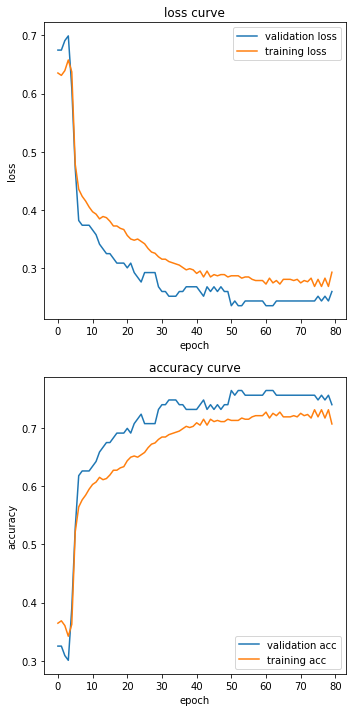

In [17]:
print(f'sample= {n_samples} and feature = {n_features}')
print('EPOCH %d'%(epoch) ,'ITERATION %d'%(i+1), f'LR 0.001')
plot_graph(epoch, val_loss_list, train_loss_list, val_acc_list, train_acc_list, figsize=(5,10))

In [18]:
initial_weight_normal_1.shape

(8,)

# Hyperparameter tuning with uniform random

# Experiment 2-add bias

In [19]:
np.random.seed(0)
initial_weight_b = np.random.rand(9)

In [20]:
bias = np.ones((n_samples,1))
print(bias.shape)
X_b = np.append(X_array, bias, axis=1)
print(X_b[0])
print(X_b.shape)

(768, 1)
[-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
 -0.53117    -0.0333333   1.        ]
(768, 9)


In [21]:
X_b_trainval, X_b_test, y_b_trainval, y_b_test = train_test_split(X_b, y, test_size=0.20,random_state=88)#, stratify=y, shuffle=True)
X_b_train, X_b_val, y_b_train, y_b_val = train_test_split(X_b_trainval, y_b_trainval, test_size=0.20, random_state=88)#,stratify=y_b_trainval,shuffle=True)
print("Training Size :",X_b_train.shape)
print("Testing Size :",X_b_test.shape)
print("Validation Size :",X_b_val.shape)

Training Size : (491, 9)
Testing Size : (154, 9)
Validation Size : (123, 9)


In [22]:
n_samples_b, n_features_b = X_b.shape

In [23]:
epoch_b = 80
best_b_acc = 0
weight_b = initial_weight_b
val_loss_list_b = []
train_loss_list_b = []
val_acc_list_b = []
train_acc_list_b = []
for i in range(epoch_b):
    weight_b = update_weight(X_b_train, y_b_train, weight_b)

    y_b_train_pred = make_prediction(X_b_train, y_b_train, weight_b)
    y_b_val_pred = make_prediction(X_b_val, y_b_val, weight_b)

    train_b_acc = accuracy_score(y_b_train, y_b_train_pred)
    val_b_acc = accuracy_score(y_b_val, y_b_val_pred)
    
    train_acc_list_b.append(train_b_acc)
    val_acc_list_b.append(val_b_acc)

    train_b_loss = zero_one_loss(X_b_train, y_b_train, weight_b)
    val_b_loss = zero_one_loss(X_b_val, y_b_val, weight_b)
    
    train_loss_list_b.append(train_b_loss)
    val_loss_list_b.append(val_b_loss)

    
    if val_b_acc>best_b_acc:
        best_b_acc = val_b_acc
#     print('EPOCH %d'%(epoch_b) ,'ITERATION %d'%(i+1), f'LR 0.001')

#     print('train acc: %.5f'%train_b_acc, 'val acc: %.5f'%val_b_acc, 
#           'best acc: %.5f'%best_b_acc)
    
#     print('train loss: %.5f'%train_b_loss, 'val loss: %.5f'%val_b_loss)
  
#     print('----')

sample= 768, feature = 9 included bias
EPOCH 80 ITERATION 80 LR 0.001


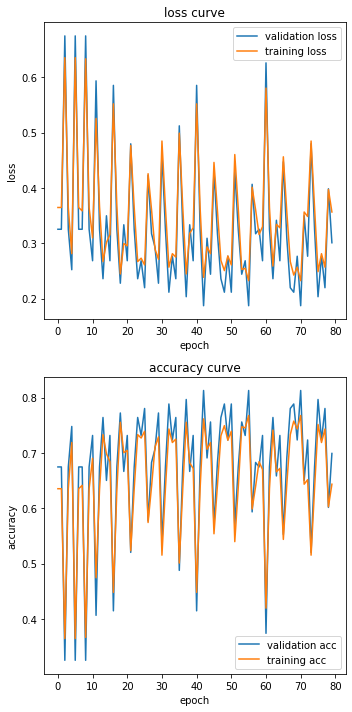

In [24]:
print(f'sample= {n_samples_b}, feature = {n_features_b} included bias')
print('EPOCH %d'%(epoch_b) ,'ITERATION %d'%(i+1), f'LR 0.001')
plot_graph(epoch, val_loss_list_b, train_loss_list_b, val_acc_list_b, train_acc_list_b, figsize=(5,10))


# Experiment 3 - learning rate


sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 1


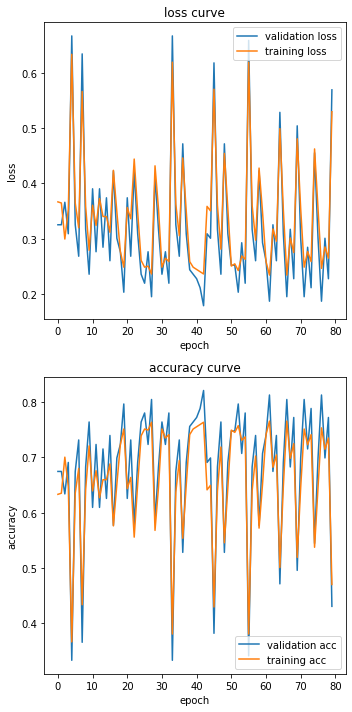

sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 0.1


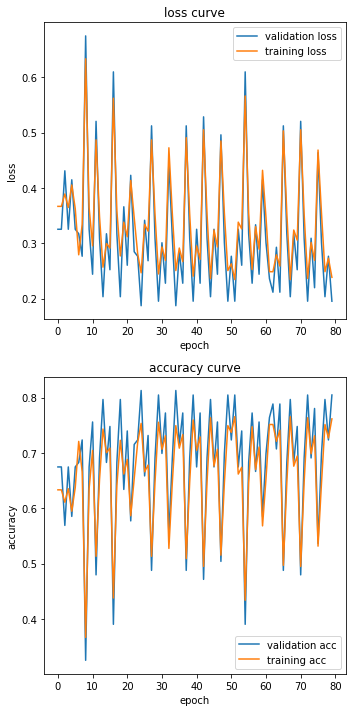

sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 0.001


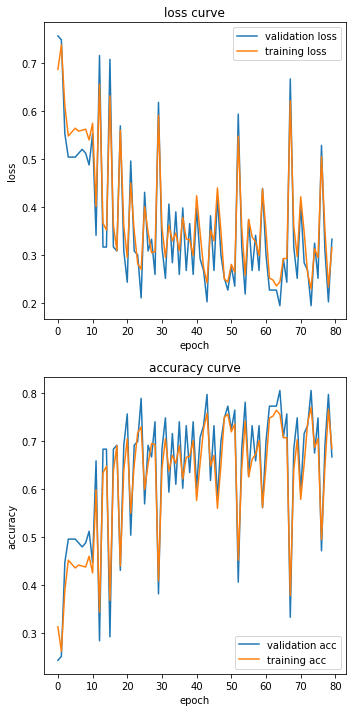

sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 0.0001


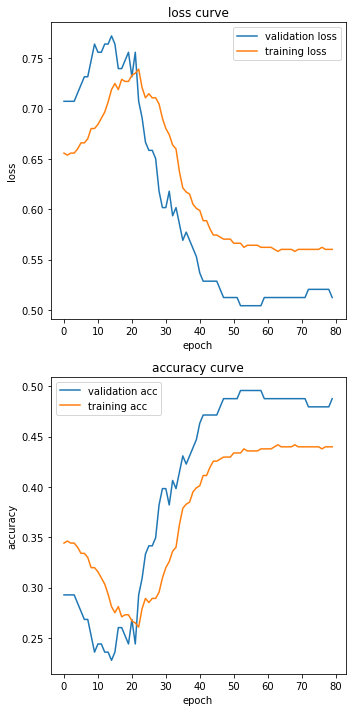

sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 1e-05


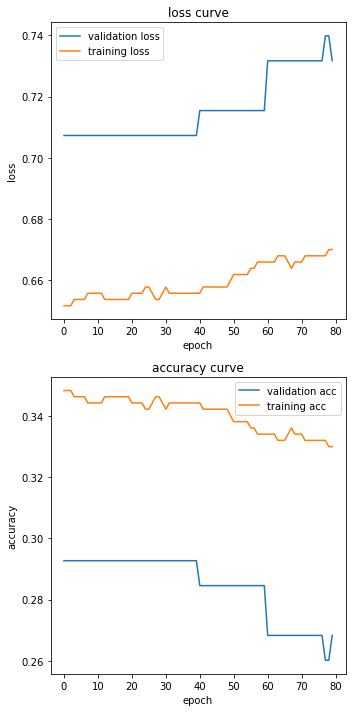

In [25]:
epoch2 = 80
best_acc2 = 0
best_lr = 0
plot_result = []
lr = [1, 0.1, 0.001, 0.0001, 0.00001]
for l in lr:
    np.random.seed(0)
    initial_weight_lr = np.random.rand(8)
    weight2 = initial_weight_lr
    val_loss_list_lr = []
    train_loss_list_lr = []
    val_acc_list_lr = []
    train_acc_list_lr = []

    for i in range(epoch2):
        
        weight2 = update_weight(X_train, y_train, weight2, lr=l)

        y_train_pred2 = make_prediction(X_train, y_train, weight2)
        y_val_pred2 = make_prediction(X_val, y_val, weight2)

        train_acc2 = accuracy_score(y_train, y_train_pred2)
        val_acc2 = accuracy_score(y_val, y_val_pred2)

        train_acc_list_lr.append(train_acc2)
        val_acc_list_lr.append(val_acc2)

        train_loss2 = zero_one_loss(X_train, y_train, weight2)
        val_loss2 = zero_one_loss(X_val, y_val, weight2)

        train_loss_list_lr.append(train_loss2)
        val_loss_list_lr.append(val_loss2)       
        
        if val_acc2>best_acc2:
            best_acc2 = val_acc2
            best_lr = l
#         print('EPOCH %d'%(epoch2) ,'ITERATION %d'%(i+1), f'LR {l}')

#         print('train acc: %.5f'%train_acc2, 'val acc: %.5f'%val_acc2, 
#               'best acc: %.5f'%best_acc2, f'best lr {best_lr}')
#         print('train loss: %.5f'%train_loss2, 'val loss: %.5f'%val_loss2)

#         print('----')
    print(f'sample= {n_samples} and feature = {n_features}') 
    print('EPOCH %d'%(epoch2) ,'ITERATION %d'%(i+1), f'LR {l}')
    
    plot_graph(epoch2, val_loss_list_lr, train_loss_list_lr, val_acc_list_lr, train_acc_list_lr, figsize=(5,10))

# experiment 4: bias + lr

sample= 768, feature = 9 included bias
EPOCH 80 ITERATION 80 LR1


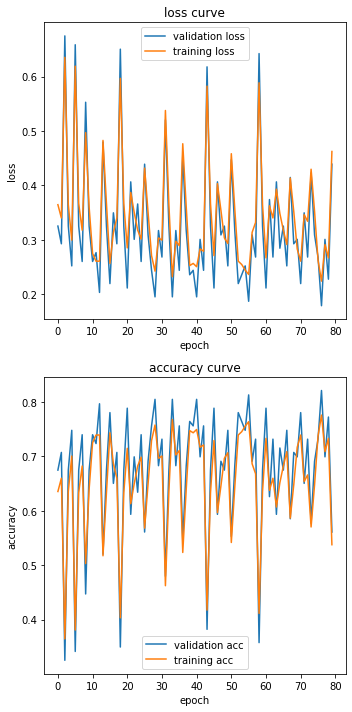

sample= 768, feature = 9 included bias
EPOCH 80 ITERATION 80 LR0.1


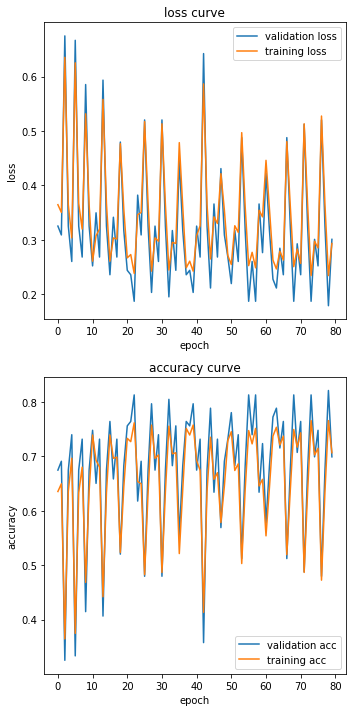

sample= 768, feature = 9 included bias
EPOCH 80 ITERATION 80 LR0.001


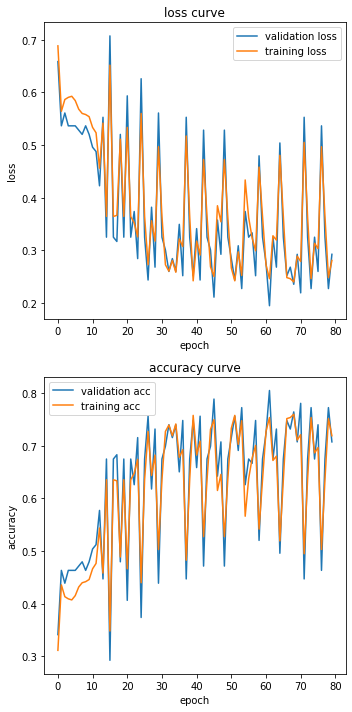

sample= 768, feature = 9 included bias
EPOCH 80 ITERATION 80 LR0.0001


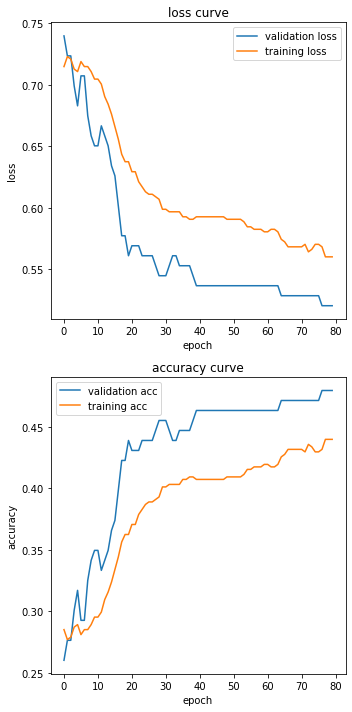

sample= 768, feature = 9 included bias
EPOCH 80 ITERATION 80 LR1e-05


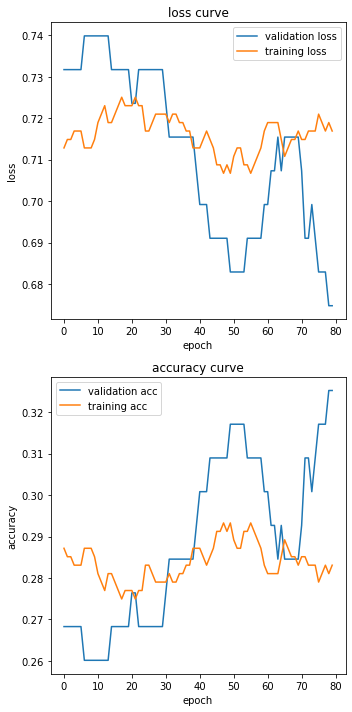

In [26]:
epoch_blr = 80
best_blr_acc = 0
best_blr = 0
lr = [1, 0.1, 0.001, 0.0001, 0.00001]
for l3 in lr:
    np.random.seed(0)
    initial_weight_blr = np.random.rand(9)
    weight_blr = initial_weight_blr

    val_loss_list_blr = []
    train_loss_list_blr = []
    val_acc_list_blr = []
    train_acc_list_blr = []

    for i in range(epoch_blr):
        
        weight_blr = update_weight(X_b_train, y_b_train, weight_blr, lr=l3)

        y_train_pred3 = make_prediction(X_b_train, y_b_train, weight_blr)
        y_val_pred3 = make_prediction(X_b_val, y_b_val, weight_blr)

        train_acc3 = accuracy_score(y_b_train, y_train_pred3)
        val_acc3 = accuracy_score(y_b_val, y_val_pred3)

        train_acc_list_blr.append(train_acc3)
        val_acc_list_blr.append(val_acc3)

        train_loss3 = zero_one_loss(X_b_train, y_b_train, weight_blr)
        val_loss3 = zero_one_loss(X_b_val, y_b_val, weight_blr)

        train_loss_list_blr.append(train_loss3)
        val_loss_list_blr.append(val_loss3)
        
        if val_acc3>best_blr_acc:
            best_blr_acc = val_acc3
            best_blr = l3
#         print('EPOCH %d'%(epoch_blr) ,'ITERATION %d'%(i+1), f'LR{l3}')

#         print('train acc: %.5f'%train_acc3, 'val acc: %.5f'%val_acc3, 
#               'best acc: %.5f'%best_blr_acc, f'best lr {best_blr}')
#         print('train loss: %.5f'%train_loss3, 'val loss: %.5f'%val_loss3)

#         print('----')
    print(f'sample= {n_samples_b}, feature = {n_features_b} included bias')

    print('EPOCH %d'%(epoch_blr) ,'ITERATION %d'%(i+1), f'LR{l3}')
    plot_graph(epoch_blr, val_loss_list_blr, train_loss_list_blr, val_acc_list_blr, train_acc_list_blr, figsize=(5,10))

# experiment 5: epoch

In [43]:
epoch_list = list(range(10,110,10))
best_acc_ep = 0
best_epoch = 0


for epoch_item in epoch_list:
    val_loss_list_ep = []
    train_loss_list_ep = []
    val_acc_list_ep = []
    train_acc_list_ep = []
    np.random.seed(0)
    initial_weight_ep = np.random.rand(8)
    weight_ep = initial_weight_ep
    print(epoch_item)
    for i in range(epoch_item):
        weight_ep = update_weight(X_train, y_train, weight_ep)

        y_train_pred_ep = make_prediction(X_train, y_train, weight_ep)
        y_val_pred_ep = make_prediction(X_val, y_val, weight_ep)

        train_acc_ep = accuracy_score(y_train, y_train_pred_ep)
        val_acc_ep = accuracy_score(y_val, y_val_pred_ep)

        train_acc_list_ep.append(train_acc_ep)
        val_acc_list_ep.append(val_acc_ep)

        train_loss_ep = zero_one_loss(X_train, y_train, weight_ep)
        val_loss_ep = zero_one_loss(X_val, y_val, weight_ep)

        train_loss_list_ep.append(train_loss_ep)
        val_loss_list_ep.append(val_loss_ep)


        if val_acc_ep>best_acc_ep:
            best_acc_ep = val_acc_ep
            best_epoch = epoch_item
#         print('EPOCH %d'%(epoch_item) ,'ITERATION %d'%(i+1), f'LR 0.001')

#         print('train acc: %.5f'%train_acc_ep, 'val acc: %.5f'%val_acc_ep, 
#               'best acc: %.5f'%best_acc_ep, f'best epoch:{best_epoch}')
#         print('train loss: %.5f'%train_loss_ep, 'val loss: %.5f'%val_loss_ep)

#         print('----')
#     print(f'sample= {n_samples} and feature = {n_features}') 

#     print('EPOCH %d'%(epoch_item) ,'ITERATION %d'%(i+1), f'LR 0.001')
#     plot_graph(epoch_item, val_loss_list_ep, train_loss_list_ep, val_acc_list_ep, train_acc_list_ep, figsize=(5,10))

10
20
30
40
50
60
70
80
90
100


# experiment 6: bias, lr, epoch 

In [42]:
epoch_list = list(range(10,110,10))
lr = [1, 0.1, 0.001, 0.0001, 0.00001]

best_acc5 = 0
best_epoch5 = 0
best_lr5 = 0
best_weight5 = 0


for epoch_item in epoch_list:
    for l5 in lr:
        np.random.seed(0)
        initial_weight5 = np.random.rand(8)
        weight5 = initial_weight5
        val_loss_list5 = []
        train_loss_list5 = []
        val_acc_list5 = []
        train_acc_list5 = []
        for i in range(epoch_item):
            weight5 = update_weight(X_train, y_train, weight5, lr = l5)
            y_train_pred5 = make_prediction(X_train, y_train, weight5)
            y_val_pred5 = make_prediction(X_val, y_val, weight5)

            train_acc5 = accuracy_score(y_train, y_train_pred5)
            val_acc5 = accuracy_score(y_val, y_val_pred5)

            train_acc_list5.append(train_acc5)
            val_acc_list5.append(val_acc5)

            train_loss5 = zero_one_loss(X_train, y_train, weight5)
            val_loss5 = zero_one_loss(X_val, y_val, weight5)

            train_loss_list5.append(train_loss5)
            val_loss_list5.append(val_loss5)


            if val_acc5 > best_acc5:
                best_acc5 = val_acc5
                best_epoch5 = epoch_item
                best_lr5 = l5
                best_weight5 = weight5
                
#             print('EPOCH %d'%(epoch_item) ,'ITERATION %d'%(i+1), f'LR{l5}')
            
#             print('weight ', weight5)
#             print('train acc: %.5f'%train_acc5, 'val acc: %.5f'%val_acc5, 
#                   'best acc: %.5f'%best_acc5, f'best epoch:{best_epoch5}', 
#                   f'best lr:{best_lr5}', f'best weight:{best_weight5}')
#             print('train loss: %.5f'%train_loss5, 'val loss: %.5f'%val_loss5)

#             print('----')
#         print(f'sample= {n_samples} and feature = {n_features}') 

#         print('EPOCH %d'%(epoch_item) ,'ITERATION %d'%(i+1), f'LR{l5}')
#         plot_graph(epoch_item, val_loss_list5, train_loss_list5, val_acc_list5, train_acc_list5, figsize=(5,10))

In [29]:
# epoch_list = list(range(10,61,10))
# lr = [1, 0.1, 0.001, 0.0001, 0.00001]

# best_acc5b = 0
# best_epoch5b = 0
# best_lr5b = 0
# best_weight5b = 0


# for l5b in lr:
#     for epoch_item5 in epoch_list:
#         np.random.seed(0)
#         initial_weight5b = np.random.rand(9)
#         weight5b = initial_weight5b
#         val_loss_list5b = []
#         train_loss_list5b = []
#         val_acc_list5b = []
#         train_acc_list5b = []
#         for i in range(epoch_item5):
#             weight5b = update_weight(X_b_train, y_b_train, weight5b, lr=l5b)
#             y_train_pred5b = make_prediction(X_b_train, y_b_train, weight5b)
#             y_val_pred5b = make_prediction(X_b_val, y_b_val, weight5b)

#             train_acc5b = accuracy_score(y_b_train, y_train_pred5b)
#             val_acc5b = accuracy_score(y_b_val, y_val_pred5b)

#             train_acc_list5b.append(train_acc5b)
#             val_acc_list5b.append(val_acc5b)

#             train_loss5b = zero_one_loss(X_b_train, y_b_train, weight5b)
#             val_loss5b = zero_one_loss(X_b_val, y_b_val, weight5b)

#             train_loss_list5b.append(train_loss5b)
#             val_loss_list5b.append(val_loss5b)

#             if val_acc5b > best_acc5b:
#                 best_acc5b = val_acc5b
#                 best_epoch5b = epoch_item5
#                 best_lr5b = l5b
#                 best_weight5b = weight5b
            
#             print('EPOCH %d'%(epoch_item5) ,'ITERATION %d'%(i+1), f'LR{l5b}')

            
#             print('weight ', weight5b)

#             print('train acc: %.5f'%train_acc5b, 'val acc: %.5f'%val_acc5b, 
#                   'best acc: %.5f'%best_acc5b, f'best epoch:{best_epoch5b}', f'best lr:{best_lr5b}', 
#                   f'best weight:{best_weight5b}')
                  
#             print('train loss: %.5f'%train_loss5b, 'val loss: %.5f'%val_loss5b)

#             print('----')
#         print(f'sample= {n_samples_b}, feature = {n_features_b} included bias')
#         print('EPOCH %d'%(epoch_item5),'ITERATION %d'%(i+1), f'LR {l5b}')
#         plot_graph(epoch_item5, val_loss_list5b, train_loss_list5b, val_acc_list5b, train_acc_list5b, figsize=(5,10))

In [30]:
# from sklearn.linear_model import Perceptron
# clf = Perceptron(tol=1e-3, random_state=0)
# clf.fit(X_trainval, y_trainval)
# Perceptron()
# y_pred_sk = clf.predict(X_test)
# clf.score(X_test, y_test)


In [31]:
# accuracy = accuracy_score(y_test, y_pred_sk ) # accuracy: (tp + tn) / (p + n)
# print('Accuracy: %f' % accuracy)

# precision = precision_score(y_test, y_pred_sk) # precision tp / (tp + fp)
# print('Precision: %f' % precision)

# recall = recall_score(y_test, y_pred_sk) # recall: tp / (tp + fn)
# print('Recall: %f' % recall)

# f1 = f1_score(y_test, y_pred_sk) # f1: 2 tp / (2 tp + fp + fn)
# print('F1 score: %f' % f1)

In [32]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred_sk))

In [33]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test,y_pred_sk))
# sns.heatmap(confusion_matrix(y_test,y_pred_sk),annot=True)



# test on experiment 6

In [34]:
# EPOCH 40 ITERATION 36 LR0.001 bias=Y

In [35]:
# optimal_epoch = 40
# optimal_lr = 0.01
print(best_weight5)
optimal_weight = best_weight5


y_test_pred = make_prediction(X_test, y_test, optimal_weight)

test_acc = accuracy_score(y_test, y_test_pred)

print('test acc: %.5f'%test_acc)


[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
test acc: 0.70130


In [36]:
# # optimal_epoch = 40
# # optimal_lr = 0.01
# print(best_weight5b)
# optimal_weightb = best_weight5b


# y_test_pred = make_prediction(X_b_test, y_b_test, optimal_weightb)

# test_acc_b = accuracy_score(y_b_test, y_test_pred)

# print('test acc: %.5f'%test_acc_b)


In [37]:
accuracy = accuracy_score(y_test, y_test_pred ) # accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_test_pred) # precision tp / (tp + fp)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_test_pred) # recall: tp / (tp + fn)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_test_pred) # f1: 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % f1)

Accuracy: 0.701299
Precision: 0.695364
Recall: 1.000000
F1 score: 0.820312


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        -1.0       1.00      0.06      0.12        49
         1.0       0.70      1.00      0.82       105

    accuracy                           0.70       154
   macro avg       0.85      0.53      0.47       154
weighted avg       0.79      0.70      0.60       154



In [39]:
from sklearn.metrics import confusion_matrix

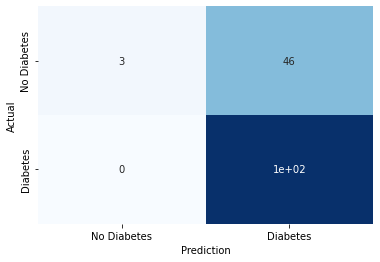

<Figure size 432x288 with 0 Axes>

In [40]:
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()